In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

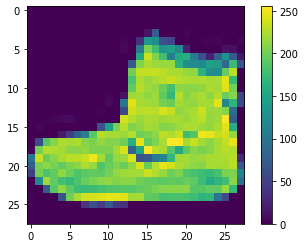

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

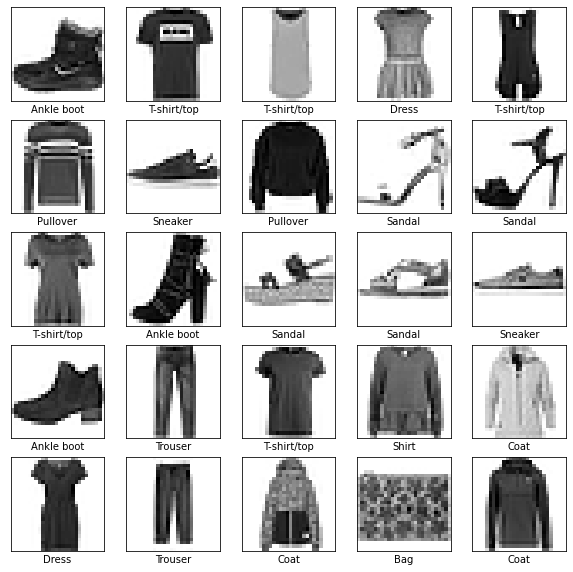

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
#tworzenie i konfiguracja modelu
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
#trenowanie modelu
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4990 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3747 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2696 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [12]:
#ocena modelu
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.3392 - accuracy: 0.8814 - 560ms/epoch - 2ms/step


In [13]:
#prognoza
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [15]:
predictions[0]

array([6.1594443e-07, 1.3334554e-08, 2.0767475e-08, 5.6997003e-09,
 5.8955909e-08, 1.2579619e-02, 7.5185557e-07, 6.0327402e-03,
 5.0074900e-06, 9.8138124e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [21]:
#wizualizacja danych
def plot_image(i,predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red' 

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                        color=color)

In [22]:
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

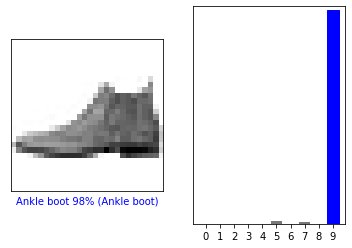

In [23]:
i = 0
plt.Figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

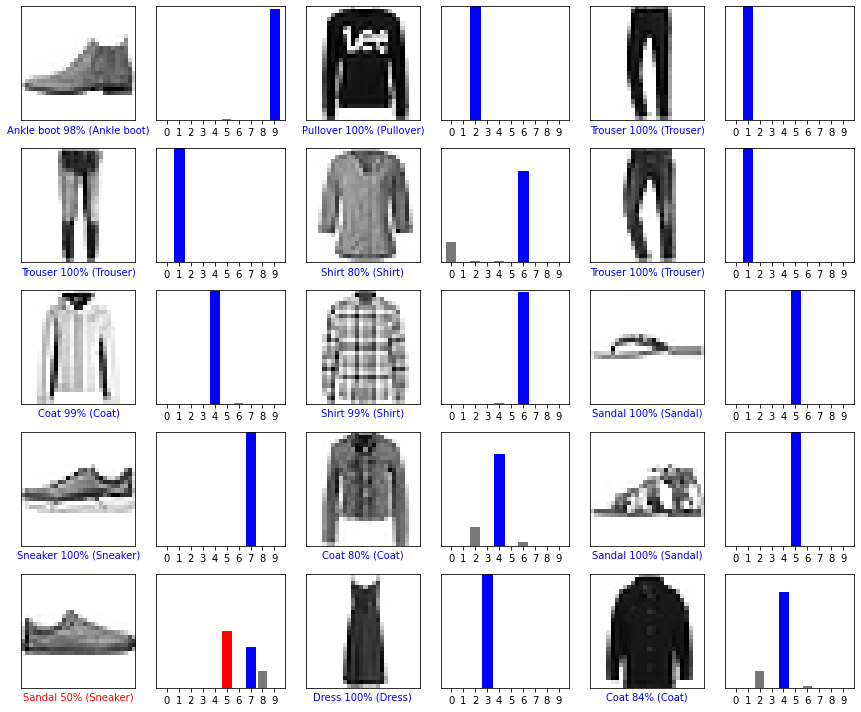

In [33]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [35]:
img = test_images[1]
print(img.shape)

(28, 28)


In [36]:
img = (np.expand_dims(img,0))

In [37]:
print(img.shape)

(1, 28, 28)


In [38]:
prediction_single = probability_model.predict(img)
print(prediction_single)

1/1 [==============================] - 0s 19ms/step
[[4.7740887e-05 2.3978300e-11 9.9960989e-01 8.8924132e-08 1.0731614e-04
  4.7012200e-11 2.3499492e-04 5.9851490e-14 6.5713737e-09 2.1090071e-10]]


In [39]:
np.argmax(prediction_single[0])

2

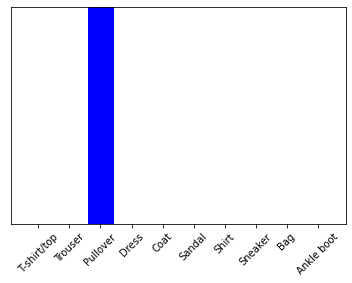

In [40]:
plot_value_array(1,prediction_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)